# Ikhsan Herdi Fajriyanto

**TRAVEL INSURANCE** 

**JCDS 2804 023**

# Introduction

A third-party travel insurance servicing company that is based in Singapore. Travel insurance is a type of insurance that provides protection as long as we travel both domestically and abroad. Several countries have even required travelers to have travel insurance, for example, countries in Europe and America. The amount of premium depends on the coverage desired, the length of the trip, and the purpose of the trip. A company engaged in travel insurance wants to know the policyholder who will submit an insurance claim for coverage. Policyholder data at insurance companies is historical data consisting of destinations, insurance products, and so on.




# Context

Pada studi kasus ini terdapat perusahaan asuransi yang menawarkan jasa asuransi kepada calon traveler. Berdasarkan dari dataset tersebut banyak orang yang mengajukan klaim untuk asuransi
mereka saat mereka melakukan perjalanan, namun tidak semua klaim dapat di terima. Maka dari itu perusahaan ingin mengetahui informasi siapa saja customer yang berhak menerima klaim
(mengalami resiko yang akan dipertanggung oleh perusahaan) dan mana yang ditolak. Karena dalam hal ini perusahaan juga akan terbantu dalam hal mengurangi beban, kinerja dan waktu serta kualitas pelayanan penyedia asuransi perjalanan kepada para pelaku perjalanan.

<br>

**Target:**<br>
`0` : **Klaim ditolak/Tidak Menerima Klaim** <br>
`1` : **Klaim diterima/Berhak Menerima Klaim**



# Problem Statement

Terdapat `44.328` data dari customer yang ingin mengajukan klaim, banyaknya calon pelaku perjalanan yang mengajukan Claim bisa memakan waktu dan kinerja yang dibutuhkan para agensi penyedia asuransi perjalanan. Oleh karena itu agensi hanya ingin memberikan Claim bagi pelaku perjalanan yang benar-benar mengajukan Claim dan telah mengisi formulir pengajuan secara benar dan lengkap. Selain itu agensi hanya ingin memberikan Claim berdasarkan produk asuransi yang memiliki kemungkinan yang sangat besar untuk di-klaim oleh pelaku perjalanan.

Dari dataset yang diberikan, banyak pelaku perjalanan yang tidak mengisi kolom jenis kelamin dan dianggap mengisi formulir pengajuan asuransi secara tidak lengkap, atau mengisi data yang dianggap tidak sah oleh agensi seperti durasi perjalanan lebih dari 18 bulan (sesuai durasi standar mayoritas asuransi perjalanan), atau mengajukan Claim untuk produk asuransi yang tidak memiliki kemungkinan yang sangat besar untuk di-klaim.

# Goals

Berdasarkan permasalah tersebut, maka perusahaan ingin memprediksi kemungkinan seorang calon pelaku perjalanan untuk berhak menerima Claim, sehingga tidak menyia-nyiakan waktu, beban, dan kinerja perusahaan dalam memberikan Claim asuransi perjalanan namun tidak diterima oleh calon pelaku perjalanan tersebut.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seseorang berhak menerima Claim, sehingga mereka dapat membuat rencana yang lebih baik dan meningkatkan kualitas pelayanan asuransi dan Claim untuk pelaku perjalanan dan bisa membuat pelaku perjalanan puas dalam pelayanan asuransi.

# Analytics Approach

Pada kesempatan ini yang akan dilakukan adalah menganalisis data untuk menemukan pola yang membedakan calon pelaku perjalanan yang berhak menerima Claim dan tidak berhak menerima Claim.

Kemudian akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelaku perjalanan berhak untuk menerima Claim atau tidak.

# Evaluation Matrics

![alt text](0_wPxmui5uaThY8_ab.png)

<br>

- `True Negative`: Calon pelaku perjalanan tidak mengajukan Claim dan tidak berhak menerima Claim
- `False Negative`: Calon pelaku perjalanan tidak mengajukan Claim, namun berhak menerima Claim
- `False Positive`: Calon pelaku perjalanan mengajukan Claim, namun tidak berhak menerima Claim
- `True Positive`: Calon pelaku perjalanan mengajukan Claim dan berhak menerima Claim
<br>

**Type 1 error** : False Positive<br>
Konsekuensi: sia-sianya waktu, beban, dan kinerja perusahaan dalam pelayanan asuransi karena calon pelaku perjalanan tidak menerima Claim, meskipun sudah mengajukannya.

**Type 2 error** : False Negative<br>
Konsekuensi: penurunan kualitas pelayanan asuransi bagi pelaku perjalanan karena calon pelaku perjalanan harus menerima Claim, meskipun tidak mengajukannya.
<br><br>
Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi beban dan kinerja perusahaan, tetapi tanpa menurunkan kualitas pelayanan asuransi bagi para pelaku perjalanan. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive.

# Data Understanding

- `Agency`: Name of agency.
- `Agency Type`: Type of travel insurance agencies.
- `Distribution Channel`: Channel of travel insurance agencies.
- `Product Name`: Name of the travel insurance products.
- `Gender`: Gender of insured.
- `Duration`: Duration of travel.
- `Destination`: Destination of travel.
- `Net Sales`: Amount of sales of travel insurance policies.
- `Commission (in value)`: Commission received for travel insurance agency.
- `Age`: Age of insured.
- `Claim`: Claim status.

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_selector
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import SelectPercentile

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Save Model
import pickle

# Load Dataset

In [2]:
df = pd.read_csv('data_travel_insurance.csv')
df_backup = df.copy()
df


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


# Data Cleaning (Missing Values, Outliers, Duplicate Values)

In [4]:
# Mengubah kolom 'Claim' (target) menjadi nilai 0 untuk tidak Claim dan 1 untuk yang Claim
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)

In [5]:
# Mengubah nama kolom 'Commision' (in value) menjadi 'Commision' (tanpa in value)
df = df.rename(columns = {'Commision (in value)':'Commision'})
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,0


# Missing Value Handling

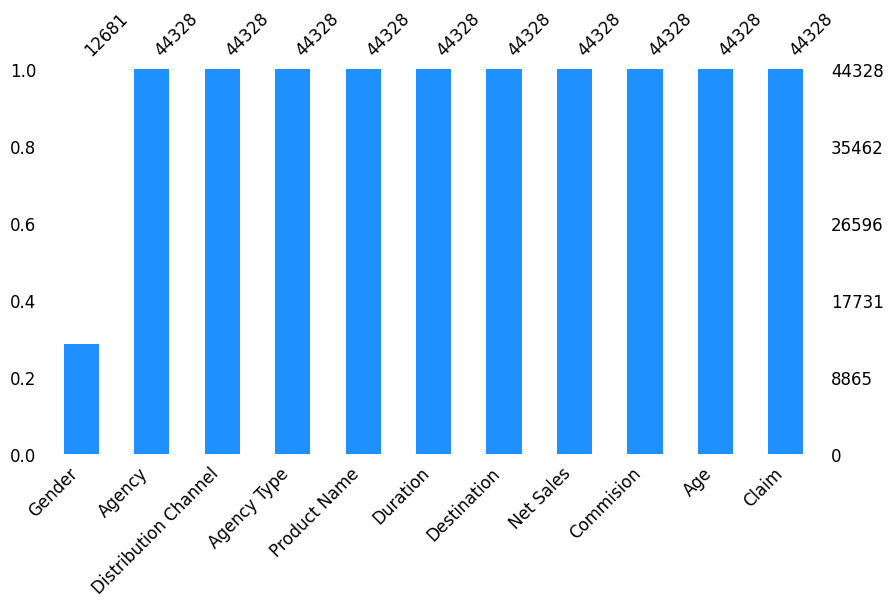

In [6]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<Axes: >

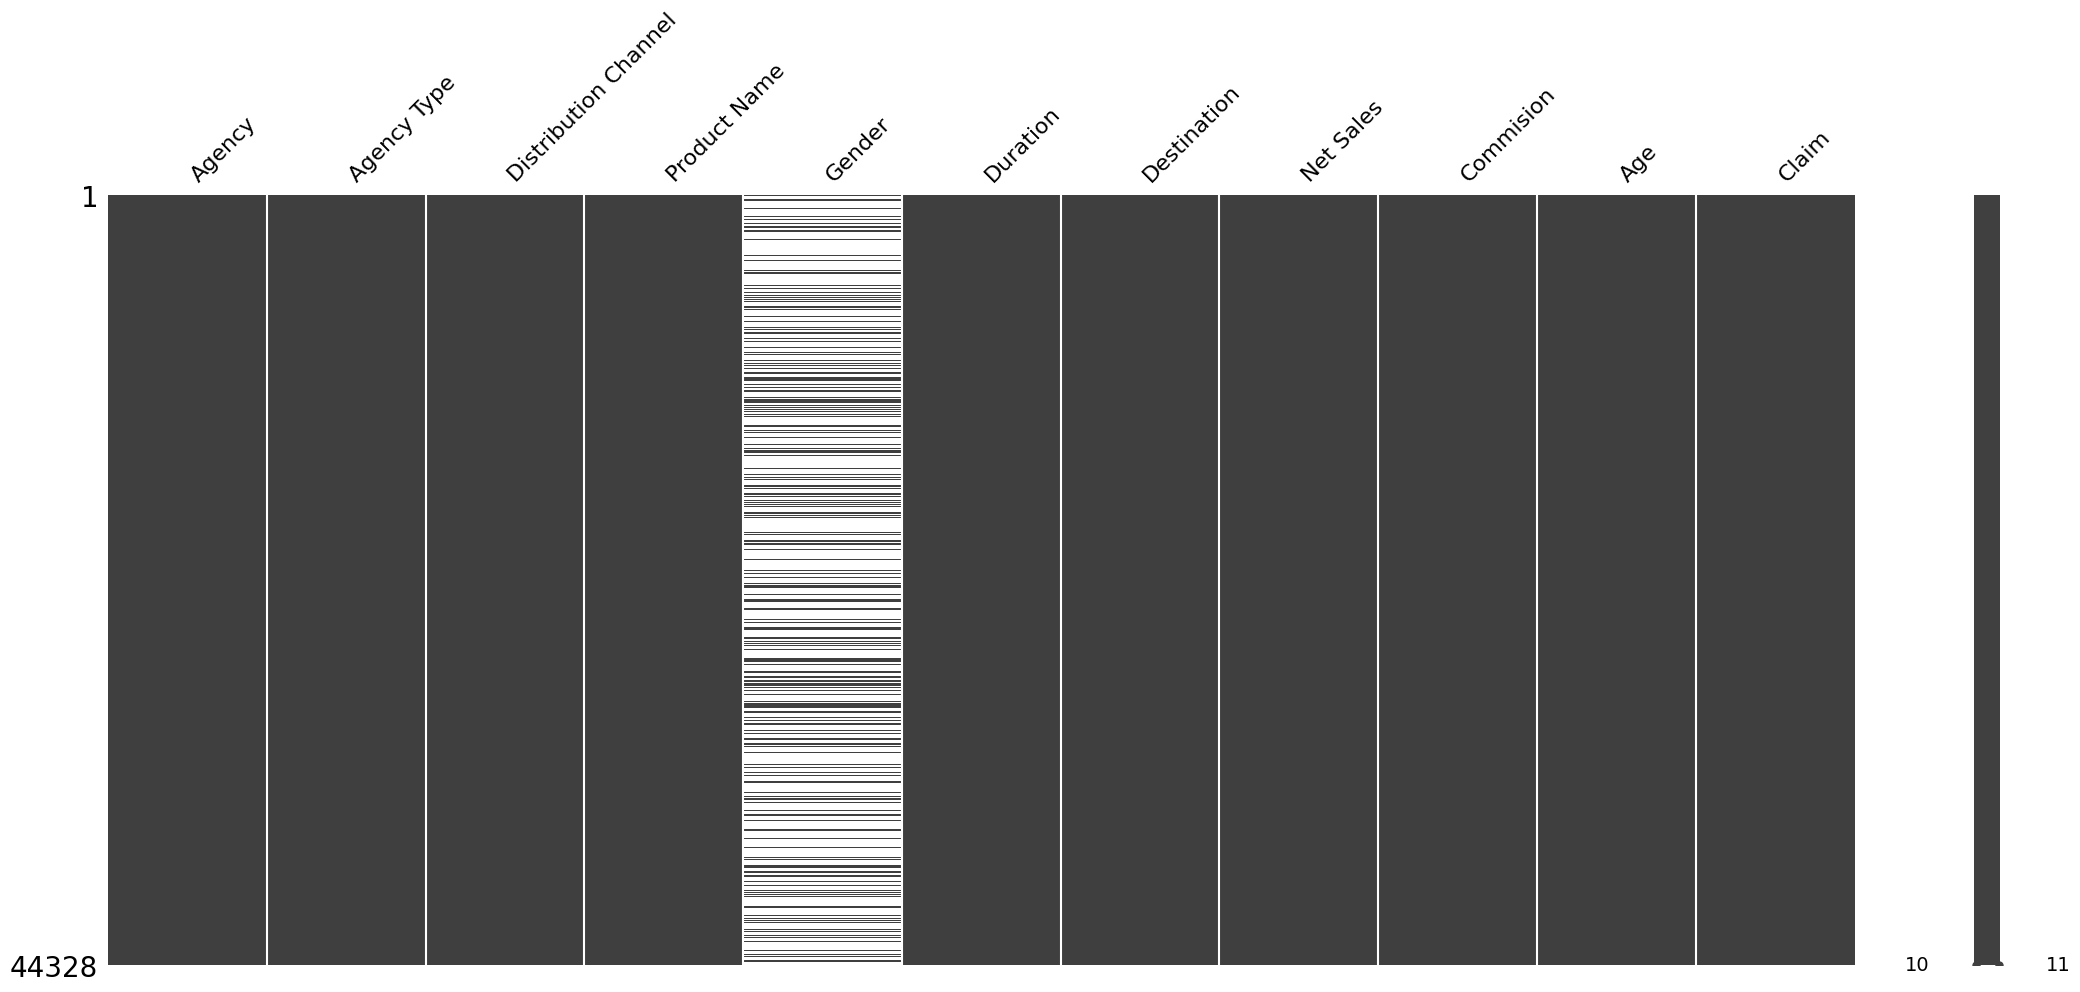

In [7]:
missingno.matrix(df)

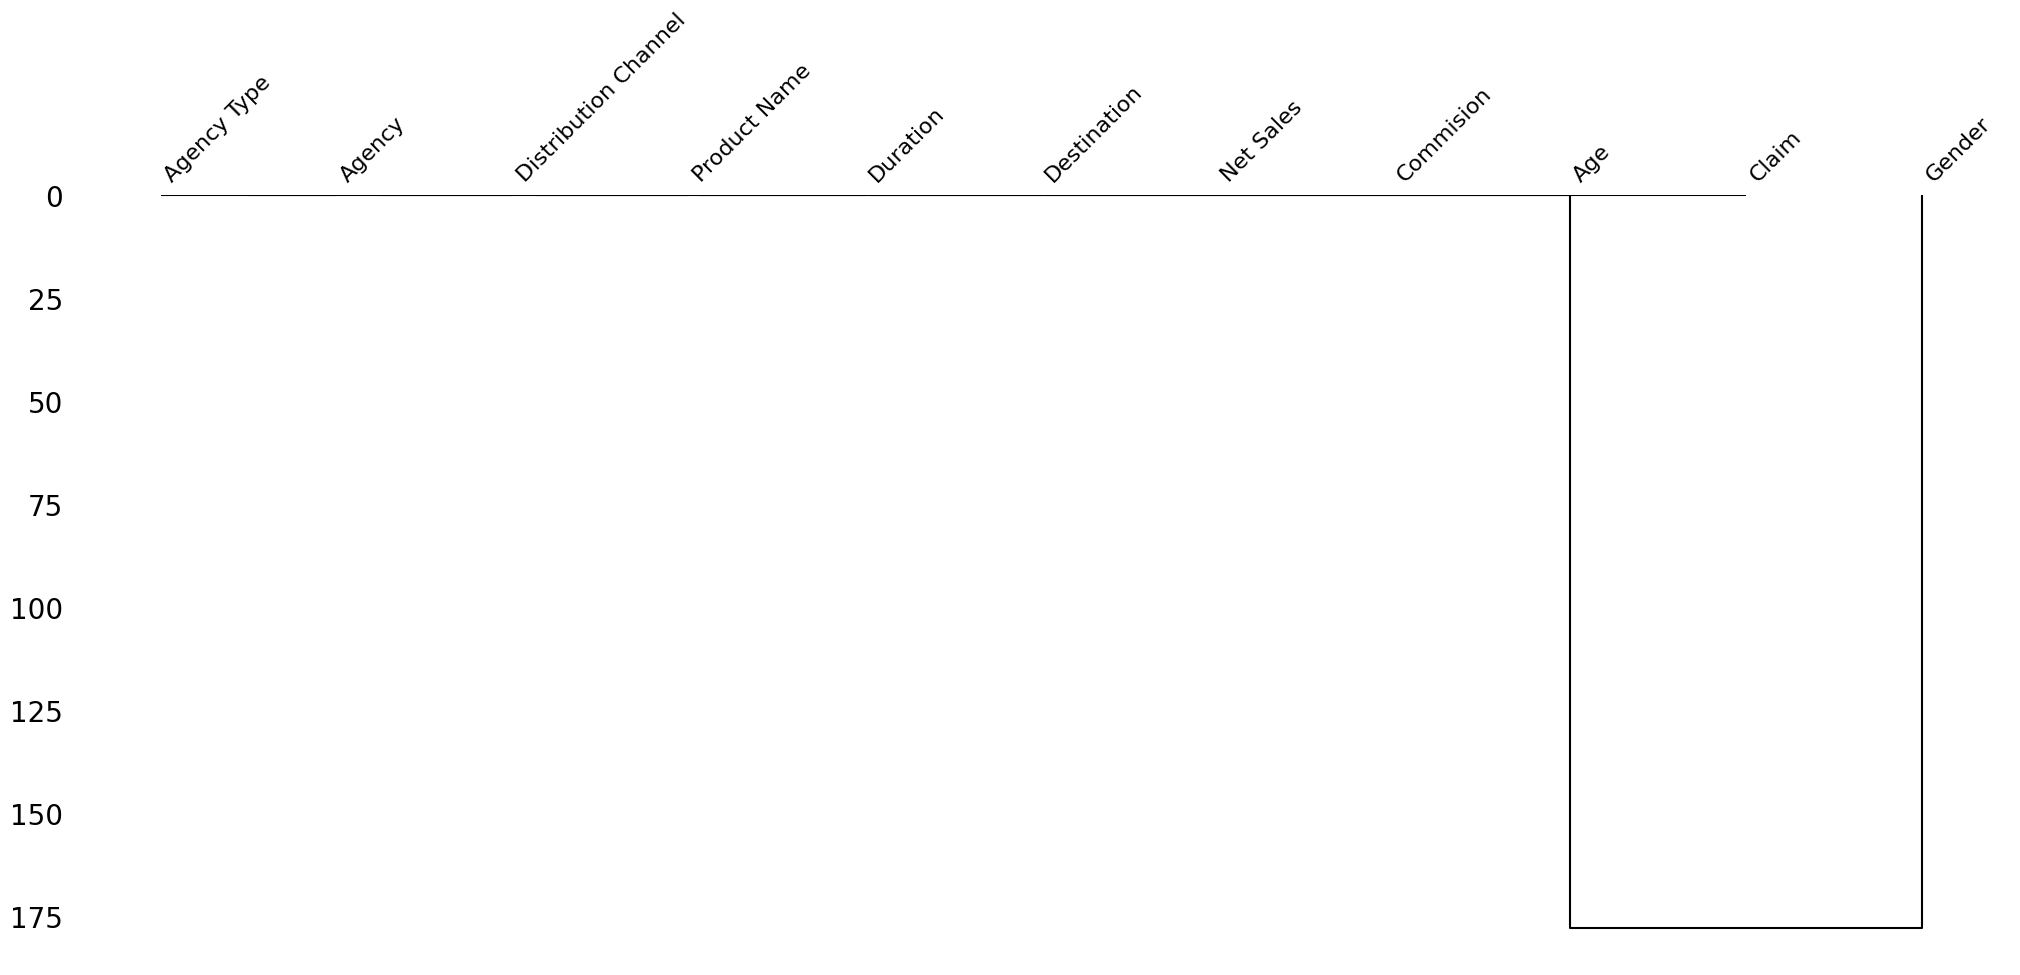

In [8]:
missingno.dendrogram(df)
plt.show()

Dengan menggunakan visualisasi data dalam bentuk Barplot dan Matrix dapat dilihat hanya kolom Gender yang memiliki data kosong dan kolom tersebut hanya terisi sebanyak 25% saja.

Dapat dilihat dari Dendogram diatas bahwa kolom Gender hanya berkorelasi dengan kolom Age (usia), oleh karena itu kita perlu mengelompokan jumlah data kosong berdasarkan rentang usia.

In [9]:
pd.DataFrame({
    'age_range':['10-19', '20-29', '30-39', '40-49', '50 or above'],
    'missing_values':[
        df[(df['Age']>=10) & (df['Age']<20)]['Gender'].isna().sum(),
        df[(df['Age']>=20) & (df['Age']<30)]['Gender'].isna().sum(),
        df[(df['Age']>=30) & (df['Age']<40)]['Gender'].isna().sum(),
        df[(df['Age']>=40) & (df['Age']<50)]['Gender'].isna().sum(),
        df[(df['Age']>=50)]['Gender'].isna().sum(),
    ]
})

,age_range,missing_values
0,10-19,26
1,20-29,2768
2,30-39,22059
3,40-49,3763
4,50 or above,3031


Dapat dilihat dari DataFrame pengelompokan data dengan nilai kosong berdasarkan rentang usia bahwa mayoritas yang tidak mencantumkan jenis kelamin mereka saat mengajukan asuransi perjalanan berada di rentang usia 30-39 tahun.

Meski demikian, pengajuan asuransi perjalanan biasanya mengharuskan pemohon untuk mengisi data secara lengkap dan benar, tidak boleh ada data yang tidak diisi dan dibiarkan kosong. Jadi kita harus menghapus semua data dengan nilai kosong agar kita dapat membuat model dan algoritma Machine Learning dan menghasilkan data yang diprediksi secara lengkap dan akurat, dan juga untuk memenuhi persyaratan pengisian data lengkap yang dibutuhkan oleh mayoritas agen penyedia asuransi perjalanan.

In [10]:
df['Gender'].isna().sum()

np.int64(31647)

In [11]:
# Menghapus data dengan nilai kosong (Missing Values) dan menghapus kolom Gender
df = df.dropna().reset_index(drop=True)
df = df.drop(['Gender'], axis=1)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.70,39,0
4,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,27,0
...,...,...,...,...,...,...,...,...,...,...
12676,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,11,CHINA,49.5,32.18,84,0
12677,JZI,Airlines,Online,Basic Plan,13,THAILAND,22.0,7.70,42,0
12678,JZI,Airlines,Online,Value Plan,11,UNITED KINGDOM,87.0,30.45,65,0
12679,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,0


Telah terhapus `31,647` baris data yang memiliki nilai Gender kosong (Missing Values) dalam dataset. Namun kita juga perlu menghapus data duplikat untuk menghindari terjadinya Overfitting dalam model Machine Learning yang akan diterapkan dalam project ini.

Selain menghapus nilai kosong, penulis juga memutuskan untuk membuang kolom Gender dikarenakan tidak adanya pengaruh kolom Gender terhadap model Machine Learning yang akan diterapkan. Tidak semua kolom variabel kategorikal dan numerikal bisa mempengaruhi model Machine Learning walaupun ada yang mempunyai korelasi dengan beberapa variabel lain.

# Duplicate Value

In [12]:
df.duplicated(keep='first').sum()

np.int64(1001)

In [13]:
# Menghapus data duplikat
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.70,39,0
4,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,27,0
...,...,...,...,...,...,...,...,...,...,...
11675,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,11,CHINA,49.5,32.18,84,0
11676,JZI,Airlines,Online,Basic Plan,13,THAILAND,22.0,7.70,42,0
11677,JZI,Airlines,Online,Value Plan,11,UNITED KINGDOM,87.0,30.45,65,0
11678,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,0


Telah terhapus `1,001` baris data duplikat yang tersisa dalam dataset.

# Outlier Handling

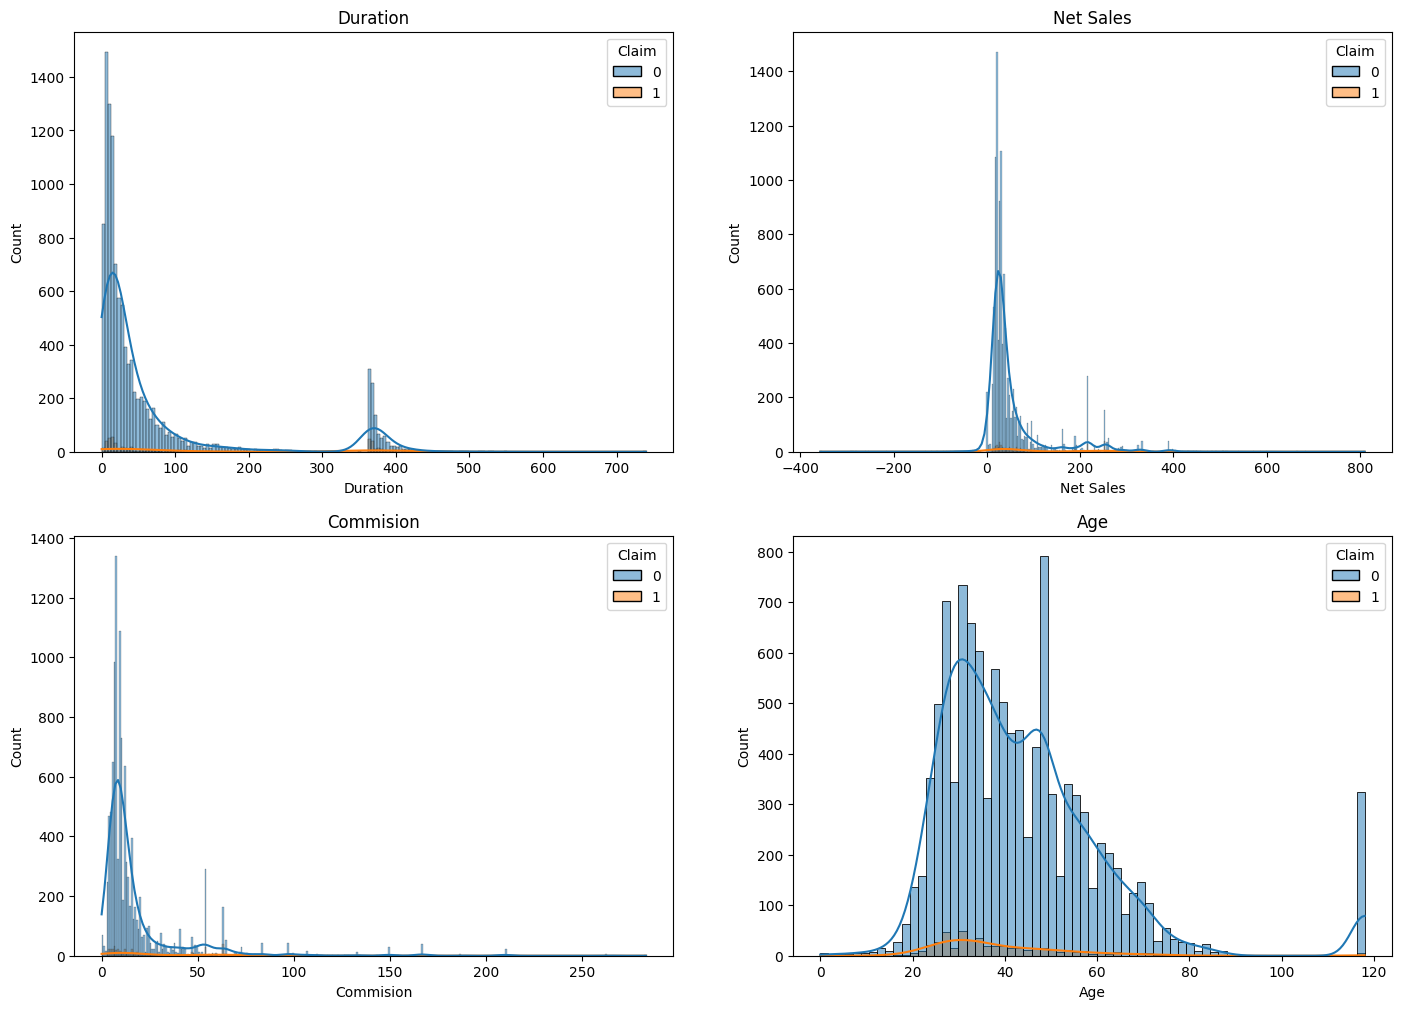

In [14]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Duration',hue='Claim',kde=True)
plt.title('Duration')

plt.subplot(222)
sns.histplot(data=df,x='Net Sales',hue='Claim',kde=True)
plt.title('Net Sales')

plt.subplot(223)
sns.histplot(data=df,x='Commision',hue='Claim',kde=True)
plt.title('Commision')

plt.subplot(224)
sns.histplot(data=df,x='Age',hue='Claim',kde=True)
plt.title('Age')

plt.show()

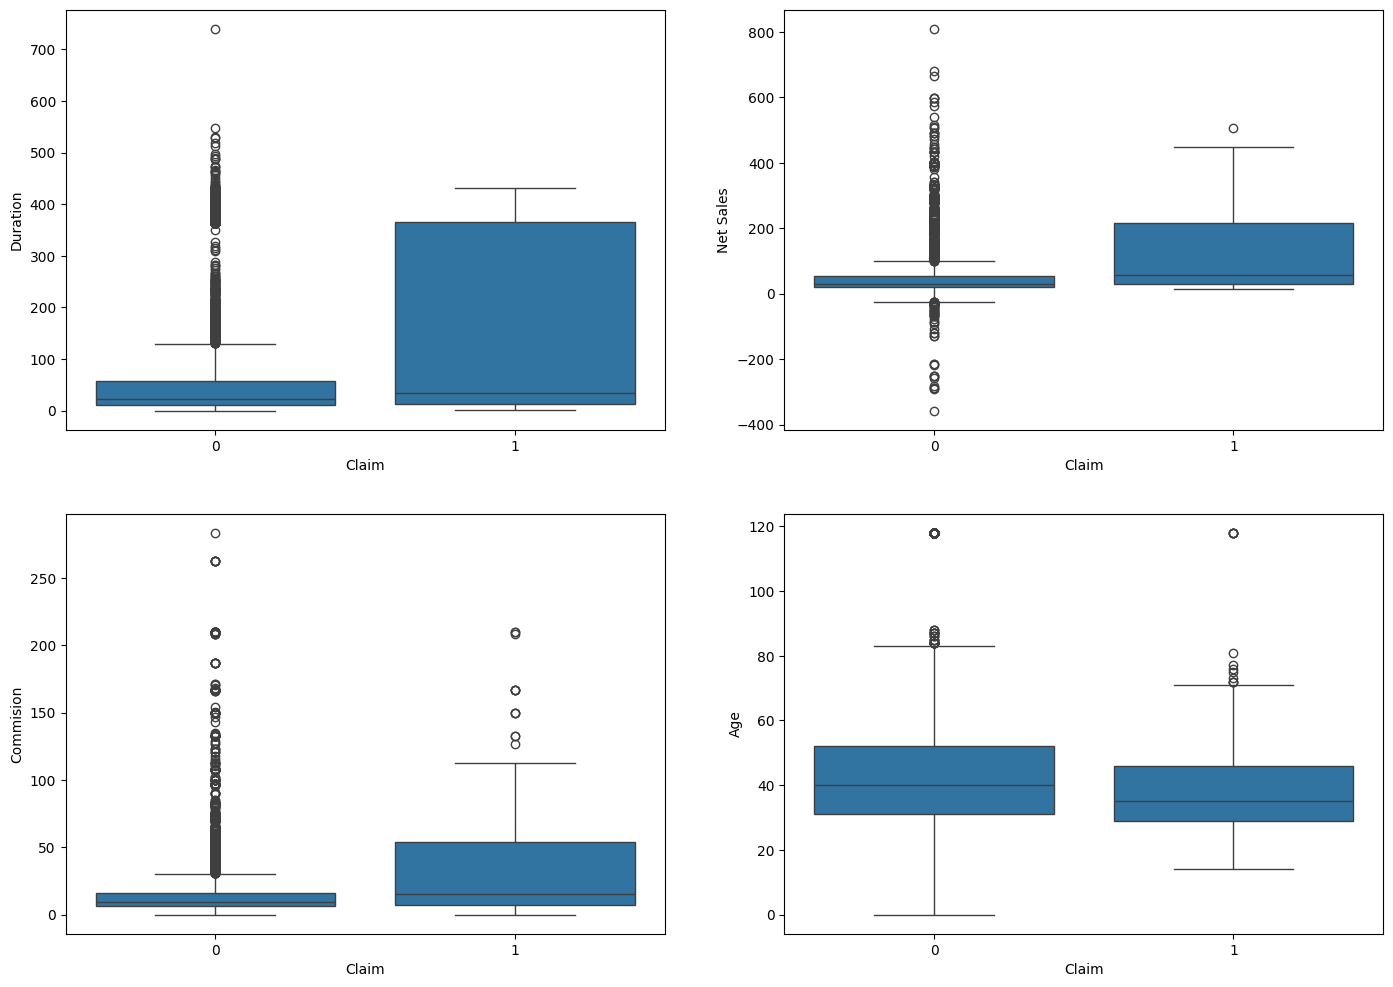

In [15]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=df,y='Duration', x='Claim')

plt.subplot(222)
sns.boxplot(data=df,y='Net Sales', x='Claim')

plt.subplot(223)
sns.boxplot(data=df,y='Commision', x='Claim')

plt.subplot(224)
sns.boxplot(data=df,y='Age', x='Claim')
plt.show()

In [16]:
df.describe()

,Duration,Net Sales,Commision,Age,Claim
count,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000
mean,69.112329,57.565016,18.538170,43.558818,0.040325
std,111.584324,73.919385,25.144105,18.591078,0.196730
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,10.000000,22.000000,6.750000,31.000000,0.000000
50%,22.000000,30.000000,9.750000,40.000000,0.000000
75%,59.000000,56.000000,16.900000,51.000000,0.000000
max,740.000000,810.000000,283.500000,118.000000,1.000000


In [17]:
df[df['Claim']==0].describe()

,Duration,Net Sales,Commision,Age,Claim
count,11209.000000,11209.000000,11209.000000,11209.000000,11209.0
mean,66.499063,55.396221,18.014674,43.756178,0.0
std,108.455233,71.562607,24.570236,18.701773,0.0
min,0.000000,-357.500000,0.000000,0.000000,0.0
25%,10.000000,22.000000,6.750000,31.000000,0.0
50%,22.000000,30.000000,9.750000,40.000000,0.0
75%,58.000000,53.500000,16.250000,52.000000,0.0
max,740.000000,810.000000,283.500000,118.000000,0.0


Dapat dilihat bahwa sebagian besar baris Data Outlier adalah data calon pelaku perjalanan yang tidak mengajukan Claim. Meski demikian, data Outlier yang akan dihapus tidak hanya berdasarkan data yang berada di luar rentang kuartil dan median, namun juga berdasarkan persyaratan yang diberlakukan oleh mayoritas agen penyedia asuransi seperti batasan durasi, komisi, dan usia calon pelaku perjalanan yang mengajukan asuransi.

Kita akan menghapus data yang tidak memenuhi syarat, salah satunya adalah data durasi perjalanan yang melebihi 18 bulan/547 hari karena kebanyakan agen penyedia asuransi hanya menawarkan asuransi dengan durasi maksimum 18 bulan. Hanya satu baris data yang tidak memenuhi persyaratan durasi perjalanan tersebut.

Selain itu, ada beberapa data calon pelaku perjalanan dengan usia lebih dari 100 tahun. Mereka diasumsi sudah tidak mampu melakukan perjalanan dikarenakan kondisi kesehatannya atau sudah meninggal sebelum mereka sempat melakukan perjalanan, sehingga data tersebut juga harus dihapus. Data pelaku perjalanan lansia berusia kurang dari 100 tahun tidak dihapus, karena asumsi bahwa mereka masih mampu untuk melakukan perjalanan selama mereka masih sehat secara fisik dan mental.

In [18]:
## Menghapus data durasi Outlier yang melebihi 18 bulan/547 hari
duration_outlier = df[df['Duration']>547]
duration_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
5882,C2B,Airlines,Online,Annual Silver Plan,740,SINGAPORE,0.0,54.19,36,0


In [19]:
# Menghapus data umur Outlier yang melebihi usia 100 tahun
age_outlier = df[df['Age']>100]
age_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
28,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,0
104,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,0
110,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,0
200,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,0
255,ART,Airlines,Online,Value Plan,137,HONG KONG,61.0,21.35,118,0
...,...,...,...,...,...,...,...,...,...,...
11553,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,0
11558,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,1
11582,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,0
11622,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,0


In [20]:
df = df.drop(duration_outlier.index)
df = df.drop(age_outlier.index).reset_index()
df = df.drop(['index'], axis=1)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.70,39,0
4,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,27,0
...,...,...,...,...,...,...,...,...,...,...
11344,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,11,CHINA,49.5,32.18,84,0
11345,JZI,Airlines,Online,Basic Plan,13,THAILAND,22.0,7.70,42,0
11346,JZI,Airlines,Online,Value Plan,11,UNITED KINGDOM,87.0,30.45,65,0
11347,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,0


Telah terhapus total `330` baris data dengan Outlier, yang mencakup 382 data dengan usia calon pelaku perjalanan lebih dari 100 tahun, dan satu data dengan durasi perjalanan lebih dari 18 bulan.

# Data Analysis

In [21]:
df.describe()

,Duration,Net Sales,Commision,Age,Claim
count,11349.000000,11349.000000,11349.00000,11349.000000,11349.000000
mean,69.836373,57.429676,18.33442,41.394925,0.041061
std,112.727182,74.215704,25.17840,13.779515,0.198440
min,0.000000,-357.500000,0.00000,0.000000,0.000000
25%,10.000000,22.000000,6.75000,30.000000,0.000000
50%,22.000000,30.000000,9.57000,39.000000,0.000000
75%,59.000000,54.500000,16.25000,50.000000,0.000000
max,547.000000,682.000000,262.76000,88.000000,1.000000


In [22]:
df_backup.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Akan dilakukan perbandingan antara dataset yang sudah di cleansing yang nantinya akan digunakan untuk analisis dan Machine Learning dengan dataset aslinya yang belum dilakukan penghapusan data duplikat, nilai kosong, dan Outlier sama sekali.

In [23]:
df_backup['Claim'].value_counts()

Claim
No     43651
Yes      677
Name: count, dtype: int64

In [24]:
df['Claim'].value_counts()

Claim
0    10883
1      466
Name: count, dtype: int64

In [25]:
df_backup['Claim'].value_counts()/len(df_backup['Claim']) * 100

Claim
No     98.472749
Yes     1.527251
Name: count, dtype: float64

In [26]:
df['Claim'].value_counts()/len(df['Claim']) * 100

Claim
0    95.893911
1     4.106089
Name: count, dtype: float64

Jika dilihat bahwa dalam dataset asli 98.4% pelaku perjalanan tidak mengajukan Claim. Namun setelah menghapus Missing Values, Duplicates, dan Outlier dalam variable dataset DF jumlah pelaku perjalanan yang tidak mengajukan Claim berkurang menjadi 95.8%.

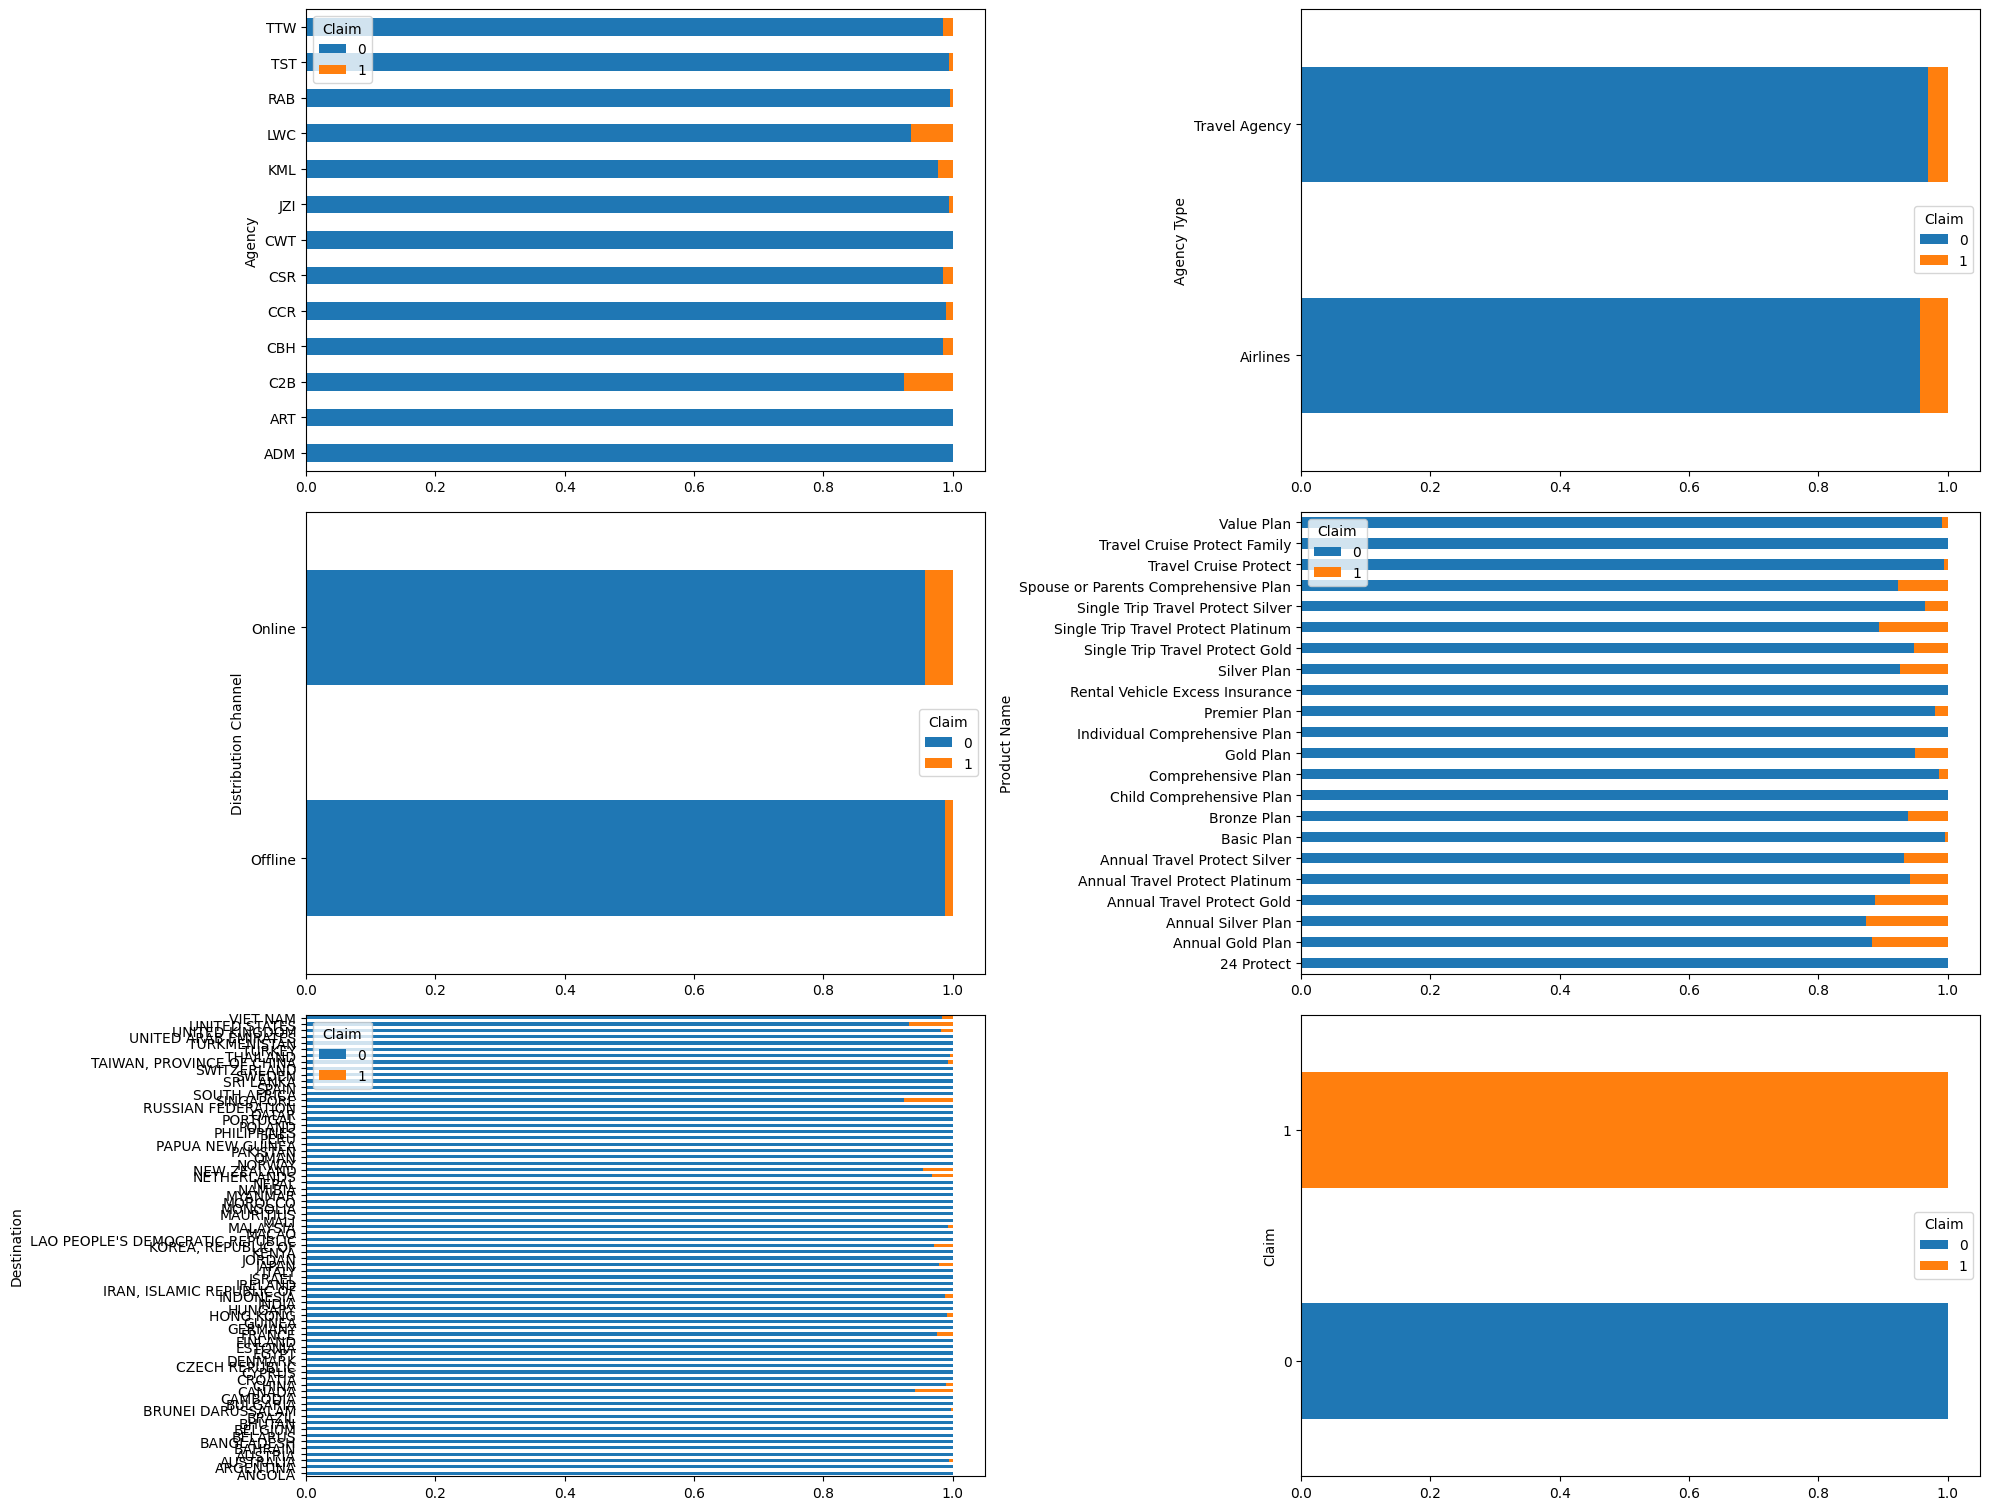

In [27]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Duration','Net Sales','Commision','Age']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Claim'], normalize=0).plot(kind='barh',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [28]:
for i in df.drop(columns=['Duration','Net Sales','Commision','Age']).columns:
    analysis_df = pd.crosstab(df[i],df['Claim'], normalize=0).reset_index()
    display(analysis_df.sort_values(by=[1.0], ascending=False))

Claim,Agency,0,1
2,C2B,0.924433,0.075567
9,LWC,0.935841,0.064159
8,KML,0.978166,0.021834
12,TTW,0.984848,0.015152
3,CBH,0.985075,0.014925
5,CSR,0.985294,0.014706
4,CCR,0.989474,0.010526
11,TST,0.993884,0.006116
7,JZI,0.994742,0.005258
10,RAB,0.996825,0.003175


Claim,Agency Type,0,1
0,Airlines,0.957494,0.042506
1,Travel Agency,0.969857,0.030143


Claim,Distribution Channel,0,1
1,Online,0.957187,0.042813
0,Offline,0.988854,0.011146


Claim,Product Name,0,1
2,Annual Silver Plan,0.873821,0.126179
1,Annual Gold Plan,0.882353,0.117647
3,Annual Travel Protect Gold,0.887097,0.112903
16,Single Trip Travel Protect Platinum,0.893617,0.106383
18,Spouse or Parents Comprehensive Plan,0.923077,0.076923
14,Silver Plan,0.927027,0.072973
5,Annual Travel Protect Silver,0.932203,0.067797
7,Bronze Plan,0.939256,0.060744
4,Annual Travel Protect Platinum,0.941176,0.058824
15,Single Trip Travel Protect Gold,0.947761,0.052239


Claim,Destination,0,1
59,SINGAPORE,0.925254,0.074746
71,UNITED STATES,0.931937,0.068063
13,CANADA,0.941176,0.058824
48,NEW ZEALAND,0.954545,0.045455
47,NETHERLANDS,0.968750,0.031250
...,...,...,...
61,SPAIN,1.000000,0.000000
60,SOUTH AFRICA,1.000000,0.000000
67,TURKEY,1.000000,0.000000
68,TURKMENISTAN,1.000000,0.000000


Claim,Claim,0,1
1,1,0.0,1.0
0,0,1.0,0.0


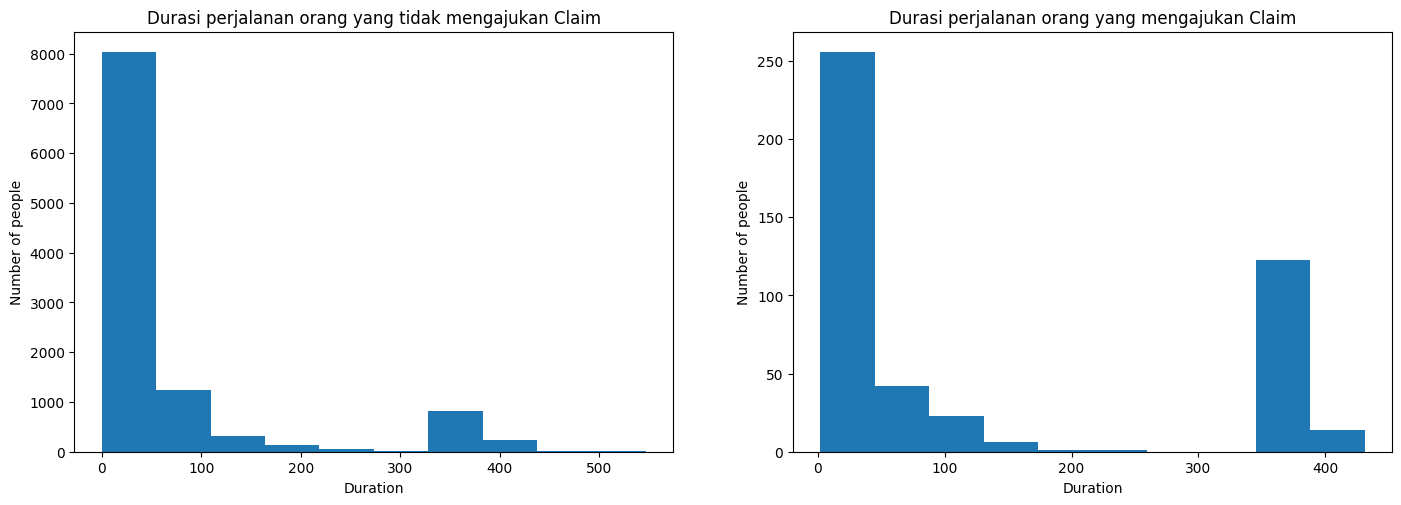

In [29]:
plt.figure(figsize=(17,12))

plt.subplot(221)
plt.hist(df[df['Claim']==0]['Duration'])
plt.xlabel('Duration')
plt.ylabel('Number of people')
plt.title('Durasi perjalanan orang yang tidak mengajukan Claim')

plt.subplot(222)
plt.hist(df[df['Claim']==1]['Duration'])
plt.xlabel('Duration')
plt.ylabel('Number of people')
plt.title('Durasi perjalanan orang yang mengajukan Claim')

plt.show()

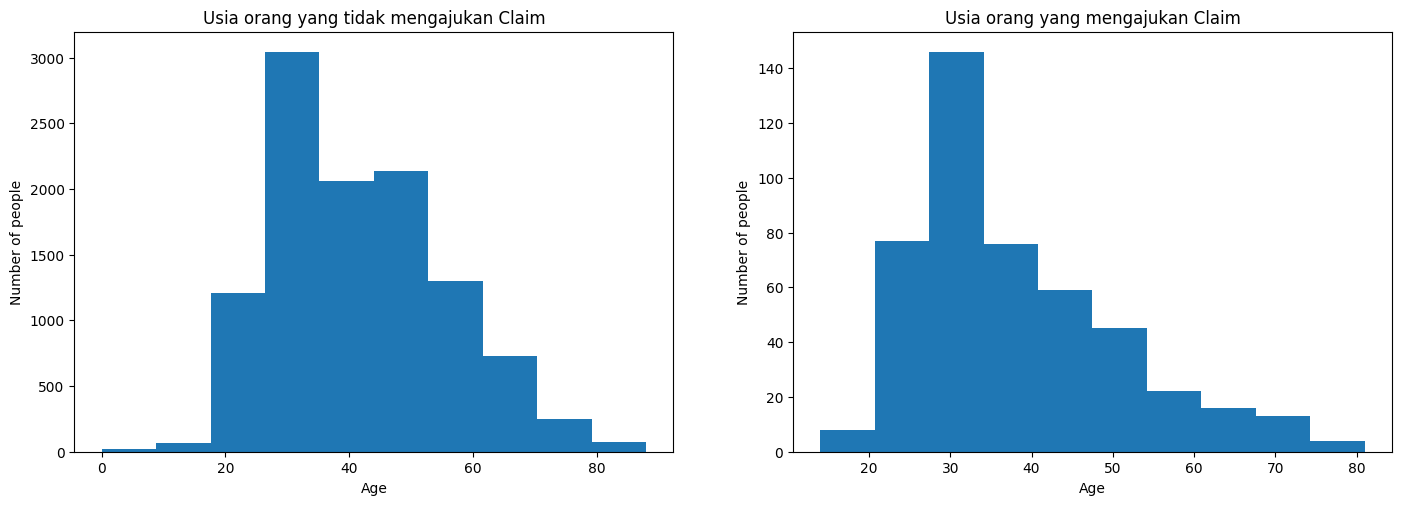

In [30]:
plt.figure(figsize=(17,12))

plt.subplot(221)
plt.hist(df[df['Claim']==0]['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Usia orang yang tidak mengajukan Claim')

plt.subplot(222)
plt.hist(df[df['Claim']==1]['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Usia orang yang mengajukan Claim')

plt.show()

Berdasarkan barplot, table dan histogram diatas kita dapat menyimpulkan beberapa hal :

- Claim paling banyak ditemui pada agensi C2B kemudian LWC, KML, dan TTW. Tidak ada Claim yang ditemukan pada agensi ADM, ART, CWT.
- Claim paling banyak ditemui pada agensi yang bergerak di bidang maskapai penerbangan dibandingkan agen penyedia jasa perjalanan.
- Claim paling banyak dilakukan oleh calon pelaku perjalanan yang melakukan distribusi Claim melalui kanal daring (Online) dibandingkan kanal tatap muka (Offline).
- 5 Produk yang memiliki ratio Claim paling besar adalah Annual Silver Plan, Annual Gold Plan, Annual Travel Protect Gold, Single Trip Travel Protect Platinum & Spouse or - Parents Comprehensive Plan. Kelima produk asuransi tersebut biasa dipesan oleh mayoritas calon pelaku perjalanan jangka panjang.
- 5 destinasi terpopuler oleh calon pelaku perjalanan yang mengajukan Claim adalah Singapura, Amerika Serikat, Kanada, Selandia Baru, dan Belanda. Kelima destinasi tersebut merupakan beberapa destinasi terpopuler saat liburan ke luar negeri.
- Mayoritas calon pelaku perjalanan (baik yang mengajukan Claim atau tidak) melakukan perjalanan berdurasi kurang dari 50 hari, dikarenakan mereka hanya bepergian dalam jangka waktu pendek.
- Mayoritas calon pelaku perjalanan yang mengajukan Claim berusia sekitar 30-39 tahun. Meski demikian, sebagian besar pelaku perjalanan secara keseluruhan berusia sekitar 20-59 tahun.

# Feature Engineering

Feature Engineering dilakukan dengan cara:


1. Encoding variabel kategorikal menggunakan One Hot (untuk kolom Agency Type dan Distribution Channel yang hanya memiliki 2 data unik) dan Binary (untuk kolom yang memiliki data nominal yang banyak).

2. Scaling menggunakan Robust Scaler supaya data tidak dipengaruhi oleh Data Outlier yang melebihi batas Q1 dan Q3.

**Encoding Variable**

In [31]:
onehot = OneHotEncoder(drop = 'first')
binary = ce.BinaryEncoder()

onehot_var = ['Agency Type','Distribution Channel','Claim']
binary_var = ['Agency','Product Name','Destination']

In [32]:
trans = ColumnTransformer([
    ('binary', binary, binary_var),
    ('one hot', onehot, onehot_var)
], remainder = 'passthrough')

trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('one hot', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel',
                                  'Claim'])])

In [33]:
df_encoded = trans.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded)
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,22.0,7.70,39.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11344,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,49.5,32.18,84.0
11345,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,22.0,7.70,42.0
11346,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,11.0,87.0,30.45,65.0
11347,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,94.0,30.0,10.50,0.0


In [34]:
trans.transformers_[0][1].get_feature_names_out()

array(['Agency_0', 'Agency_1', 'Agency_2', 'Agency_3', 'Product Name_0',
       'Product Name_1', 'Product Name_2', 'Product Name_3',
       'Product Name_4', 'Destination_0', 'Destination_1',
       'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5',
       'Destination_6'], dtype=object)

In [35]:
trans.transformers_[1][1].get_feature_names_out()

array(['Agency Type_Travel Agency', 'Distribution Channel_Online',
       'Claim_1'], dtype=object)

In [36]:
feature_names = list(trans.transformers_[0][1].get_feature_names_out()) + list(trans.transformers_[1][1].get_feature_names_out()) + ['Duration', 'Net Sales', 'Commision (in value)', 'Age',]
df_encoded.columns = feature_names
df_encoded

,Agency_0,Agency_1,Agency_2,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Agency Type_Travel Agency,Distribution Channel_Online,Claim_1,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,22.0,7.70,39.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11344,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,49.5,32.18,84.0
11345,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,22.0,7.70,42.0
11346,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,11.0,87.0,30.45,65.0
11347,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,94.0,30.0,10.50,0.0


In [37]:
df_encoded.rename({'Claim_1':'Claim'}, axis=1, inplace = True)
df_encoded.rename({'Commision (in value)':'Commision'}, axis=1, inplace = True)
df_encoded.rename({'Agency Type_Travel Agency':'Agency Type'}, axis=1, inplace = True)
df_encoded.rename({'Distribution Channel_Online':'Distribution Channel'}, axis=1, inplace = True)
df_encoded

,Agency_0,Agency_1,Agency_2,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision,Age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,22.0,7.70,39.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11344,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,49.5,32.18,84.0
11345,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,22.0,7.70,42.0
11346,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,11.0,87.0,30.45,65.0
11347,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,94.0,30.0,10.50,0.0


In [38]:
# Define Target & Feature
y = df_encoded['Claim']
x = df_encoded.drop(columns = 'Claim')

# Splitting
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2025
)

# Feature Selection

Feature Engineering dilakukan dengan metode Select Percentile untuk menentukan variabel mana yang berpengaruh terhadap target, dan juga supaya tidak terjadi Overfitting jika semua variabel digunakan.

In [39]:
x_train.shape[1]

22

In [40]:
select = SelectPercentile(percentile= 50)
select.fit(x_train, y_train)

x_train_selected = select.transform(x_train)
x_test_selected = select.transform(x_test)

In [41]:
x_train_selected.shape[1]

11

In [42]:
x.columns 

Index(['Agency_0', 'Agency_1', 'Agency_2', 'Agency_3', 'Product Name_0',
       'Product Name_1', 'Product Name_2', 'Product Name_3', 'Product Name_4',
       'Destination_0', 'Destination_1', 'Destination_2', 'Destination_3',
       'Destination_4', 'Destination_5', 'Destination_6', 'Agency Type',
       'Distribution Channel', 'Duration', 'Net Sales', 'Commision', 'Age'],
      dtype='object')

In [43]:
feature_names = ['Agency_0', 'Agency_1', 'Agency_2', 'Agency_3', 'Product Name_0',
       'Product Name_1', 'Product Name_2', 'Product Name_3', 'Product Name_4',
       'Destination_0', 'Destination_1', 'Destination_2', 'Destination_3',
       'Destination_4', 'Destination_5', 'Destination_6', 
       'Agency Type_Travel Agency', 'Distribution Channel_Online', 'Duration',
       'Net Sales', 'Commision (in value)', 'Age']

In [44]:
# show selected feature
df_features = pd.DataFrame({
    'Features': feature_names,
    'Indicator': select.get_support()
})
df_features[df_features['Indicator']==True]

,Features,Indicator
2,Agency_2,True
3,Agency_3,True
7,Product Name_3,True
8,Product Name_4,True
12,Destination_3,True
13,Destination_4,True
14,Destination_5,True
15,Destination_6,True
18,Duration,True
19,Net Sales,True


In [45]:
feature_true = ['Agency_2', 'Agency_3', 'Product Name_3', 'Product Name_4',
       'Destination_3', 'Destination_4', 'Destination_5', 'Destination_6', 
       'Duration', 'Net Sales', 'Commision']
feature_corr = df_encoded[['Claim', 'Agency Type', 'Distribution Channel', 'Duration',
       'Net Sales', 'Commision', 'Age']]

In [46]:
feature_corr = feature_corr.corr(method='spearman')

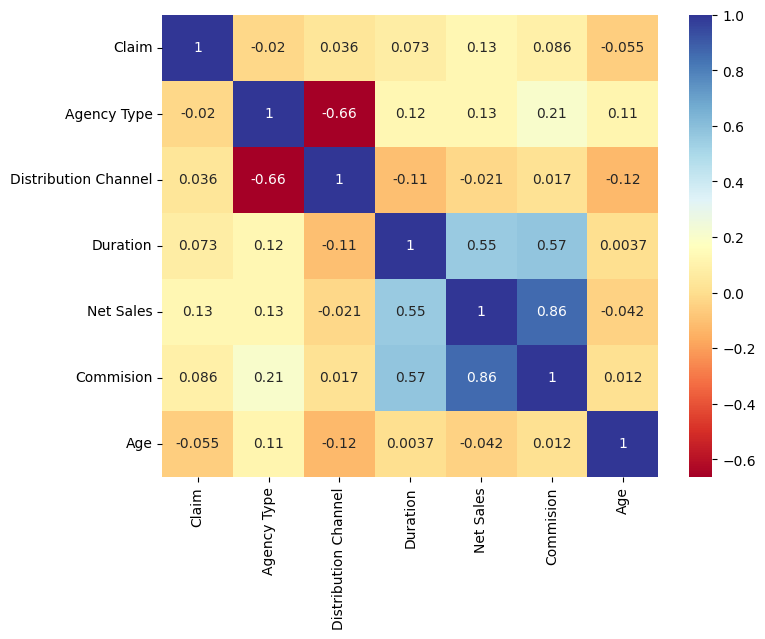

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(feature_corr,annot = True,cmap='RdYlBu')
plt.show()

# Modelling, Analytics, and Evaluation Matrics

Modelling dilakukan dengan menggunakan algoritma model Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost dan LightGBM. Karena data imbalance, masing-masing model akan dievaluasi menggunakan Pipeline dan Stratified K-Fold Cross Validation.

Metric Evaluation dilakukan dengan menggunakan ROC-AUC karena dianggap menghasilkan Mean yang lebih baik dibandingkan Balanced Accuracy.

Kita akan melihat performa setiap model menggunakan Default Hyperparameter untuk menentukan model dengan performa terbaik dan paling stabil, dan model terbaik dari evaluasi tersebut yang akan digunakan di tahap klasifikasi selanjutnya termasuk Hyperparameter Tuning.

Kemudian nantinya akan diimplementasikan menggunakan aplikasi Streamlit untuk memprediksi klaim diterima atau ditolak menggunakan model machine learning yang sudah dibuat.

In [48]:
logreg = LogisticRegression(random_state=2025)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

smote = SMOTE()
scaler = RobustScaler()

logreg_penalized = LogisticRegression(class_weight = 'balanced', random_state=2025)

# LogReg & KNN
- Without Sampling and Without Feature Selection

**Cross Validation**

In [49]:
models = [logreg,knn]

rocauc_mean_nosampling_noselect1 = []
rocauc_std_nosampling_noselect1 = []

for i in models:
    
    pipe_model_nosampling = Pipeline([
        ('scaler', scaler),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_nosampling
    
    model_nosampling_noselect=cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = -1
    )
    rocauc_mean_nosampling_noselect1.append(model_nosampling_noselect.mean())
    rocauc_std_nosampling_noselect1.append(model_nosampling_noselect.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Mean':rocauc_mean_nosampling_noselect1,
    'Std':rocauc_std_nosampling_noselect1,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
Logistic Regression,0.759661,0.022393
KNN,0.574188,0.037271


**Performance Checker**

In [50]:
models = [logreg, knn]
rocauc_test_nosampling_noselect1 = []
rocauc_train_nosampling_noselect1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test)
    y_pred_train = estimator.predict(x_train)
    rocauc_test_nosampling_noselect1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_nosampling_noselect1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Train Set': rocauc_train_nosampling_noselect1,
    'Validation Set': rocauc_mean_nosampling_noselect1,
    'Test Set': rocauc_test_nosampling_noselect1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.500000,0.759661,0.499770
KNN,0.519648,0.574188,0.510064


- With Sampling and Without Feature Selection

**Cross Validation**

In [51]:
models = [logreg,knn]

rocauc_mean_sampling_noselect1 = []
rocauc_std_sampling_noselect1 = []

for i in models:
    
    pipe_model_sampling = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_sampling
    
    model_sampling_noselect=cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = -1
    )
    rocauc_mean_sampling_noselect1.append(model_sampling_noselect.mean())
    rocauc_std_sampling_noselect1.append(model_sampling_noselect.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Mean':rocauc_mean_sampling_noselect1,
    'Std':rocauc_std_sampling_noselect1,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
Logistic Regression,0.759885,0.021233
KNN,0.642599,0.040120


**Check Performance**

In [52]:
models = [logreg, knn]
rocauc_test_sampling_noselect1 = []
rocauc_train_sampling_noselect1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test)
    y_pred_train = estimator.predict(x_train)
    rocauc_test_sampling_noselect1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_sampling_noselect1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Train Set': rocauc_train_sampling_noselect1,
    'Validation Set': rocauc_mean_sampling_noselect1,
    'Test Set': rocauc_test_sampling_noselect1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.716385,0.759885,0.735949
KNN,0.917372,0.642599,0.645608


- Without Sampling and With Feature Selection

**Cross Validation**

In [53]:
models = [logreg,knn]

rocauc_mean_nosampling_select1 = []
rocauc_std_nosampling_select1 = []

for i in models:
    
    pipe_model_nosampling = Pipeline([
        ('scaler', scaler),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_nosampling
    
    model_nosampling_select=cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = -1
    )
    rocauc_mean_nosampling_select1.append(model_nosampling_select.mean())
    rocauc_std_nosampling_select1.append(model_nosampling_select.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Mean':rocauc_mean_nosampling_select1,
    'Std':rocauc_std_nosampling_select1,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
Logistic Regression,0.759661,0.022393
KNN,0.574188,0.037271


**Check Performance**

In [54]:
models = [logreg, knn]
rocauc_test_nosampling_select1 = []
rocauc_train_nosampling_select1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train_selected,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test_selected)
    y_pred_train = estimator.predict(x_train_selected)
    rocauc_test_nosampling_select1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_nosampling_select1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Train Set': rocauc_train_nosampling_select1,
    'Validation Set': rocauc_mean_nosampling_select1,
    'Test Set': rocauc_test_nosampling_select1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.50000,0.759661,0.499770
KNN,0.54077,0.574188,0.507308


- With Sampling and With Feature Selection

**Cross Validation**

In [55]:
models = [logreg,knn]

rocauc_mean_sampling_select1 = []
rocauc_std_sampling_select1 = []

for i in models:
    
    pipe_model_sampling = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_sampling
    
    model_sampling_select=cross_val_score(
        estimator,
        x_train_selected,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = -1
    )
    rocauc_mean_sampling_select1.append(model_sampling_select.mean())
    rocauc_std_sampling_select1.append(model_sampling_select.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Mean':rocauc_mean_sampling_select1,
    'Std':rocauc_std_sampling_select1,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
Logistic Regression,0.758324,0.027475
KNN,0.631415,0.024529


**Check Performance**

In [56]:
models = [logreg, knn]
rocauc_test_sampling_select1 = []
rocauc_train_sampling_select1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train_selected,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test_selected)
    y_pred_train = estimator.predict(x_train_selected)
    rocauc_test_sampling_select1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_sampling_select1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Train Set': rocauc_train_sampling_select1,
    'Validation Set': rocauc_mean_sampling_select1,
    'Test Set': rocauc_test_sampling_select1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.713228,0.758324,0.744729
KNN,0.781075,0.631415,0.564170


Terlihat bahwa model Logistic Regression adalah yang terbaik untuk ROC-AUC nya menggunakan default hyperparameter dibandingkan KNN. Feature Selection bisa meningkatkan performa model walaupun tidak signifikan, dan Oversampling pun tidak mempengaruhi performa model. Penggunaan Balanced Accuracy sayangnya tidak dapat menghasilkan mean terbaik dibandingkan menggunakan ROC-AUC sehingga kita memutuskan untuk hanya menggunakan ROC-AUC untuk menentukan model yang terbaik.

Performa model Logistic Regression dan KNN sangat buruk jika tidak dilakukan Oversampling/Underfitting, dan terlihat lebih stabil setelah dilakukan Oversampling. Namun di samping itu model KNN mengalami Overfitting setelah dilakukan SMOTE. Oleh karena itu kita memutuskan untuk menggunakan model Logistic Regression.

Tapi sebelum itu kita ingin mencoba test Cross Validation dan Check Performance untuk Model Tree-Based (LGBM, XGBoost, Random Forest, Decision Tree).

# Tree-Based Models

Sekarang akan dilakukan Evaluation Metrics untuk Tree-Based Models setelah dilakukan Oversampling dan Feature Selection, karena ingin menghasilkan mean terbaik dari hasil evaluasi.

**Cross Validation**

In [57]:
models = [dt,rf,xgb,lgbm]

rocauc_mean_sampling_select2 = []
rocauc_std_sampling_select2 = []

for i in models:
    
    pipe_model_sampling = Pipeline([
        ('resample', smote),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_sampling
    
    model_sampling_select=cross_val_score(
        estimator,
        x_train_selected,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = -1
    )
    rocauc_mean_sampling_select2.append(model_sampling_select.mean())
    rocauc_std_sampling_select2.append(model_sampling_select.std())
    
pd.DataFrame({
    'model':['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Mean':rocauc_mean_sampling_select2,
    'Std':rocauc_std_sampling_select2,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
LightGBM,0.758633,0.026871
XGBoost,0.744111,0.031353
Random Forest,0.672363,0.029862
Decision Tree,0.584831,0.021535


**Check Performance**

In [58]:
models = [dt,rf,xgb,lgbm]
rocauc_test_sampling_select2 = []
rocauc_train_sampling_select2 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train_selected,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test_selected)
    y_pred_train = estimator.predict(x_train_selected)
    rocauc_test_sampling_select2.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_sampling_select2.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Train Set': rocauc_train_sampling_select2,
    'Validation Set': rocauc_mean_sampling_select2,
    'Test Set': rocauc_test_sampling_select2,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

[LightGBM] [Info] Number of positive: 8706, number of negative: 8706
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 17412, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Train Set,Validation Set,Test Set
model,,,
LightGBM,0.749808,0.758633,0.598589
XGBoost,0.800591,0.744111,0.590133
Random Forest,0.848319,0.672363,0.563336
Decision Tree,0.808353,0.584831,0.576385


Terlihat bahwa model LightGBM adalah yang terbaik untuk ROC-AUC nya dari setiap Tree-Based Models yang menggunakan default hyperparameter.

Sekarang kita harus membandingkan di antara keenam model klasifikasi manakah yang akan kita gunakan berdasarkan Mean tertinggi.

In [59]:
df1 = pd.DataFrame({
    'model': ['Logistic Regression', 'KKN'],
    'Train Set': rocauc_train_sampling_select1,
    'Validation Set': rocauc_mean_sampling_select1,
    'Test Set': rocauc_test_sampling_select1
})

df2 = pd.DataFrame({
    'model': ['Desicion Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Train Set': rocauc_train_sampling_select2,
    'Validation Set': rocauc_mean_sampling_select2,
    'Test Set': rocauc_test_sampling_select2
})

df_model = pd.concat([df1, df2], ignore_index=True)    
df_model = df_model.set_index('model').sort_values(by='Validation Set', ascending=False)

df_model

,Train Set,Validation Set,Test Set
model,,,
LightGBM,0.749808,0.758633,0.598589
Logistic Regression,0.713228,0.758324,0.744729
XGBoost,0.800591,0.744111,0.590133
Random Forest,0.848319,0.672363,0.563336
KKN,0.781075,0.631415,0.564170
Desicion Tree,0.808353,0.584831,0.576385


Terlihat bahwa model Logistic Regression adalah yang terbaik untuk roc_aucnya dari setiap model yang menggunakan default hyperparameter. Tidak ada Tree-Based Models yang memiliki performa terbaik meskipun sudah dilakukan Oversampling. Semua model terlihat mengalami Overfitting baik di saat training maupun testing

Sekarang kita lanjut ke Hyperparameter Tuning.

# Hyperparameter Tuning

**Before Tuning**

In [60]:
rocauc_test_sampling_select = []
rocauc_train_sampling_select = []

estimator = Pipeline([
    ('scaler', scaler),
    ('resample', smote),
    ('algorithm', logreg)
])
    
estimator.fit(x_train_selected,y_train)

estimator = y_pred_func(model)
y_pred_test = estimator.predict(x_test_selected)
y_pred_train = estimator.predict(x_train_selected)

pd.DataFrame({
    '':['Train Score', 'Test Score', 'Model Accuracy'],
    'Score': [roc_auc_score(y_train,y_pred_train), roc_auc_score(y_test,y_pred_test), 
                      estimator.score(x_train_selected,y_train)]
})

[LightGBM] [Info] Number of positive: 8706, number of negative: 8706
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2219
[LightGBM] [Info] Number of data points in the train set: 17412, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,,Score
0,Train Score,0.747051
1,Test Score,0.589768
2,Model Accuracy,0.864302


<Axes: >

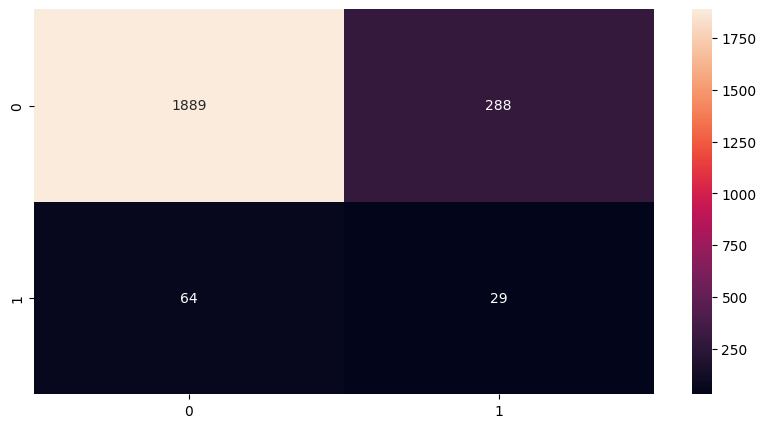

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt=".0f")

In [62]:
pd.DataFrame({
    '':['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test),
        roc_auc_score(y_test, y_pred_test),
        accuracy_score(y_test, y_pred_test)
    ]
})

,,Score
0,Recall,0.311828
1,Precision,0.091483
2,ROC-AUC,0.589768
3,Accuracy,0.844934


In [63]:
print(estimator,'\n', classification_report(y_test,y_pred_test))

Pipeline(steps=[('scaler', RobustScaler()), ('resample', SMOTE()),
                ('algorithm', LGBMClassifier())]) 
               precision    recall  f1-score   support

         0.0       0.97      0.87      0.91      2177
         1.0       0.09      0.31      0.14        93

    accuracy                           0.84      2270
   macro avg       0.53      0.59      0.53      2270
weighted avg       0.93      0.84      0.88      2270



**Tuning Process**

In [64]:
# model
pipe_model = Pipeline ([
            ('scaler', scaler),
            ('balance', smote),
            ('clf', logreg)
])

#metode cross validation
skf = StratifiedKFold(n_splits=5)

#hyperparameter
hyperparam = {
    'clf__penalty':['l1', 'l2', 'elasticnet', 'none'],
    'clf__C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005],
    'clf__solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'clf__max_iter' : [100,200,300,400,500,1000]
}

grid_search = GridSearchCV(
    pipe_model,
    param_grid = hyperparam, 
    cv = skf,
    scoring = 'roc_auc',
    n_jobs = -1
)

model_tuned = grid_search.fit(x_train_selected, y_train)
model_tuned
# default : C=1.0, solver=lbfgs, balance__k_neighbors = 5

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('balance', SMOTE()),
                                       ('clf',
                                        LogisticRegression(random_state=2025))]),
             n_jobs=-1,
             param_grid={'clf__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1,
                                    0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001,
                                    5e-05],
                         'clf__max_iter': [100, 200, 300, 400, 500, 1000],
                         'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'clf__solver': ['lbfgs', 'newton-cg', 'liblinear',
                                         'sag', 'saga']},
             scoring='roc_auc')

In [65]:
best_tuning = model_tuned.best_estimator_
pd.DataFrame({
    '':['Best Score', 'Best Params'],
    ' ': [model_tuned.best_score_, model_tuned.best_params_]
})

,,
0,Best Score,0.771692
1,Best Params,"{'clf__C': 0.005, 'clf__max_iter': 200, 'clf__..."


In [66]:
result = pd.DataFrame(model_tuned.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__max_iter,param_clf__penalty,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028762,0.003092,0.000000,0.000000,1000.0,100,l1,lbfgs,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,673
1,0.034583,0.010553,0.000000,0.000000,1000.0,100,l1,newton-cg,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,673
2,0.128217,0.006569,0.006704,0.003193,1000.0,100,l1,liblinear,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__p...",0.776286,0.757040,0.774716,0.778882,0.705734,0.758531,0.027500,271
3,0.028637,0.001094,0.000000,0.000000,1000.0,100,l1,sag,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,673
4,0.790134,0.070716,0.008265,0.003981,1000.0,100,l1,saga,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__p...",0.778482,0.756657,0.773743,0.778767,0.703560,0.758242,0.028509,311


**After Tuning**

In [67]:
best_tuning.fit(x_train_selected, y_train)
Y_pred_train = best_tuning.predict(x_train_selected)
Y_pred_test = best_tuning.predict(x_test_selected)

pd.DataFrame({
    '':['Train Score', 'Test Score'],
    'Score': [roc_auc_score(y_train,Y_pred_train), roc_auc_score(y_test,Y_pred_test)]
})

,,Score
0,Train Score,0.709267
1,Test Score,0.739770


<Axes: >

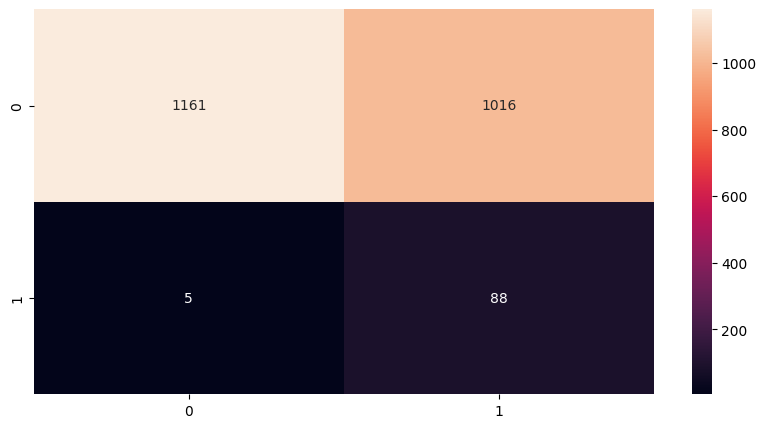

In [68]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, Y_pred_test), annot=True, fmt=".0f")

In [69]:
pd.DataFrame({
    '':['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, Y_pred_test),
        precision_score(y_test, Y_pred_test),
        roc_auc_score(y_test, Y_pred_test),
        accuracy_score(y_test, Y_pred_test)
    ]
})


,,Score
0,Recall,0.946237
1,Precision,0.079710
2,ROC-AUC,0.739770
3,Accuracy,0.550220


In [70]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69      2177
         1.0       0.08      0.95      0.15        93

    accuracy                           0.55      2270
   macro avg       0.54      0.74      0.42      2270
weighted avg       0.96      0.55      0.67      2270



Model Logistic regression setelah tuning memiliki hasil evaluasi yang lebih baik daripada model setelah tuning.

**Confusion Matrix:**

- Jumlah pelaku perjalanan yang mengajukan Claim dan berhak menerima Claim (True Positive): 88
- Jumlah pelaku perjalanan yang mengajukan Claim namun tidak berhak menerima Claim (False Negative): 5
- Jumlah pelaku perjalanan yang tidak mengajukan Claim dan tidak berhak menerima Claim (True Negative): 1161
- Jumlah pelaku perjalanan yang tidak mengajukan Claim namun berhak menerima Claim (False Positive): 1016
- Jumlah pelaku perjalanan yang berhak menerima Claim: 88 + 1016 = 1104
- Jumlah pelaku perjalanan yang tidak berhak menerima Claim: 1161 + 5 = 1166


**Hasil Evaluasi:**

- Recall: 95% dari semua pelaku perjalanan yang berhak menerima Claim berhasil diprediksi dengan benar
- Precision: Hanya 8% dari semua pelaku perjalanan yang mengajukan Claim berhasil diprediksi dengan benar
- ROC and Accuracy: 55% dari semua pelaku perjalanan yang dites berhasil diprediksi dengan benar


Oleh karena itu, model yang digunakan adalah model Logistic Regression yang telah dilakukan Scaling, Oversampling, Feature Selection, dan Hyperparameter Tuning.

# Saving Model

In [71]:
pickle.dump(estimator, open('023_Capstone Modul 3_Ikhsan.pkl', 'wb'))

# Feature Importance

In [72]:
model = LogisticRegression()
model.fit(x_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

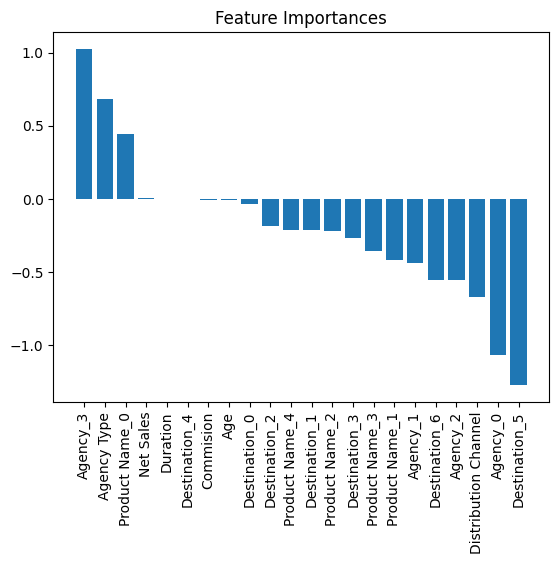

In [73]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature Importances')
plt.xticks(rotation='vertical')
plt.show()

Terlihat bahwa ternyata untuk model Logistic Regression kita, fitur/kolom Agency adalah yang paling penting, kemudian diikuti dengan Product Name, Agency Type, dan selanjutnya.

Nanti kedepannya sebenarnya kolom Destination harus dihapus bila model yang kita buat ini ingin digunakan untuk memprediksi calon pelaku perjalanan yang akan mengajukan dan menerima Claim. Berarti model yang kita buat ini akan membantu menentukan agensi penyedia asuransi perjalanan dan produk asuransi yang mempunyai kemungkinan paling besar untuk menghasilkan Claim yang bisa di-klaim oleh calon pelaku perjalanan.

# Conclusion and Recommendation/Improvement

In [74]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69      2177
         1.0       0.08      0.95      0.15        93

    accuracy                           0.55      2270
   macro avg       0.54      0.74      0.42      2270
weighted avg       0.96      0.55      0.67      2270



# Conclusion


- Model dapat mengurangi 53% calon pelaku perjalanan yang tidak berhak untuk menerima Claim, dan dapat mendapatkan 95% calon pelaku perjalanan yang berhak untuk menerima Claim.

- Ketepatan prediksi yang berhak menerima Claim hanya 8%. Maka 53% dari keseluruhan calon pelaku perjalanan tidak menerima Claim namun sudah mengajukan Claim.

- Model hanya bisa digunakan jika tidak terdapat terlalu banyak nilai kuantitatif yang melebihi Outliers atau batasan yang diterapkan oleh perusahaan. (batasan usia dan durasi perjalanan)

# Recommendation/Improvement

- Mewajibkan seluruh calon pelaku perjalanan yang mengajukan Claim asuransi untuk mengisi data secara lengkap, termasuk kolom Gender. Kita seharusnya bisa mengisi data kosong dengan variabel Gender acak, namun bisa membuang waktu dan kinerja perusahaan untuk menganalisis puluhan ribu baris data termasuk sekitar 30.000 data yang memiliki nilai kosong, dan juga bisa menaikkan jumlah calon pelaku perjalanan yang tidak berhak menerima Claim dan akibatnya menyia-nyiakan kinerja perusahaan memberikan Claim untuk asuransi namun tidak diterima oleh pelaku perjalanan.
- Menambahkan fitur dan kolom baru yang berhubungan dengan pengajuan Claim asuransi seperti nama calon pelaku perjalanan, tanggal pengajuan asuransi, harga, dan syarat dan ketentuan (Terms and Conditions).
- Melakukan pembebanan berlebih untuk fitur kuantitatif seperti durasi perjalanan, umur calon pelaku perjalanan, dan komisi.
- Feature Importance harus difokuskan kepada fitur kuantitatif, bukan fitur kualitatif.
- Mencoba menggunakan algoritma, model dan metrik Machine Learning yang lain, mencoba kembali Hyperparameter Turning, dan menggunakan teknik Resampler yang berbeda.